In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.grid_search import GridSearchCV  # Perforing grid search
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('train_last.csv')   # 读取数据
train_data = train_data.dropna()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data = train_data.apply(preprocessing.LabelEncoder().fit_transform)#把列做label encoding

#隐藏警告
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import lightgbm as lgb
from sklearn.grid_search import GridSearchCV  # Perforing grid search
from sklearn.model_selection import train_test_split



/home/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from sklearn.model_selection import train_test_split
cols = train_data.columns
x, X_test, y, y_test = train_test_split(train_data[cols[0:10]], train_data['y'], test_size = 0.30)

In [28]:
import numpy as np
#train_data = pd.read_csv('train_last.csv')   # 读取数据
y = np.array(train_data['y'])  # 用pop方式将训练数据中的标签值y取出来，作为训练目标，这里的‘30’是标签的列名
col = train_data.columns [0:10]  
x = np.array(train_data[col].values)  # 剩下的列作为训练数据

In [29]:
import torch
from matplotlib import pyplot as plt
import torch.nn.functional as F


# 自定义一个Net类，继承于torch.nn.Module类
# 这个神经网络的设计是只有一层隐含层，隐含层神经元个数可随意指定
class Net(torch.nn.Module):
    # Net类的初始化函数
    def __init__(self, n_feature, n_hidden, n_output):
        # 继承父类的初始化函数
        super(Net, self).__init__()
        # 网络的隐藏层创建，名称可以随便起
        self.hidden_layer_1 = torch.nn.Linear(n_feature, n_hidden)
        self.hidden_layer_2 = torch.nn.Linear(n_hidden, n_hidden)
        # 输出层(预测层)创建，接收来自隐含层的数据
        self.predict_layer = torch.nn.Linear(n_hidden, n_output)

    # 网络的前向传播函数，构造计算图
    def forward(self, x):
        # 用relu函数处理隐含层输出的结果并传给输出层
        hidden_result_1 = self.hidden_layer_1(x)
        relu_result_1 = F.relu(hidden_result_1)
        
        hidden_result_2 = self.hidden_layer_2(relu_result_1)
        relu_result_2 = F.relu(hidden_result_2)
        
        predict_result = self.predict_layer(relu_result_2)
        return predict_result


# 训练次数
TRAIN_TIMES = 100
# 输入输出的数据维度，这里都是1维
INPUT_FEATURE_DIM = 10
OUTPUT_FEATURE_DIM = 2
# 隐含层中神经元的个数
NEURON_NUM = 48
# 学习率，越大学的越快，但也容易造成不稳定，准确率上下波动的情况
LEARNING_RATE = 0.01

# 数据构造
# 这里x_data、y_data都是tensor格式，在PyTorch0.4版本以后，也能进行反向传播
# 所以不需要再转成Variable格式了
# linspace函数用于生成一系列数据
# unsqueeze函数可以将一维数据变成二维数据，在torch中只能处理二维数据
#x_data = torch.unsqueeze(torch.linspace(-4, 4, 80), dim=1)
# randn函数用于生成服从正态分布的随机数

x = torch.from_numpy(x)
#x = torch.tensor(x,dtype=torch.long)
#x_data = torch.unsqueeze(x,dim=1)
#y_data = torch.tensor(y_data,dtype=torch.long)
y = torch.from_numpy(y)

# 建立网络
net = Net(n_feature=INPUT_FEATURE_DIM, n_hidden=NEURON_NUM, n_output=OUTPUT_FEATURE_DIM)
print(net)


# 训练网络
# 这里也可以使用其它的优化方法
optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)
# 定义一个误差计算方法
loss_func =  torch.nn.CrossEntropyLoss()

for i in range(TRAIN_TIMES):
    # 输入数据进行预测
    prediction = net(x.float())
    # 计算预测值与真值误差，注意参数顺序问题
    # 第一个参数为预测值，第二个为真值
    loss = loss_func(prediction, y)

    # 开始优化步骤
    # 每次开始优化前将梯度置为0
    optimizer.zero_grad()
    # 误差反向传播
    loss.backward()
    # 按照最小loss优化参数
    optimizer.step()
    print('train_time:{:.0f},the loss is:{:.6f}'.format(i,loss.data))

Net(
  (hidden_layer_1): Linear(in_features=10, out_features=48, bias=True)
  (hidden_layer_2): Linear(in_features=48, out_features=48, bias=True)
  (predict_layer): Linear(in_features=48, out_features=2, bias=True)
)
train_time:0,the loss is:3.217438
train_time:1,the loss is:1416.449707
train_time:2,the loss is:323.623810
train_time:3,the loss is:30.549343
train_time:4,the loss is:59.755661
train_time:5,the loss is:82.863678
train_time:6,the loss is:100.608955
train_time:7,the loss is:113.642014
train_time:8,the loss is:122.571793
train_time:9,the loss is:127.531807
train_time:10,the loss is:128.689178
train_time:11,the loss is:126.988609
train_time:12,the loss is:122.775017
train_time:13,the loss is:116.362946
train_time:14,the loss is:108.091606
train_time:15,the loss is:98.218369
train_time:16,the loss is:86.995026
train_time:17,the loss is:74.675865
train_time:18,the loss is:61.491543
train_time:19,the loss is:47.630093
train_time:20,the loss is:33.236942
train_time:21,the loss is

In [30]:
torch.save(net.state_dict,'pre_nn_model.pkl')

In [ ]:
net.load_state_dict(torch.load(PATH))

In [31]:
X_test = np.array(X_test)
X_test = torch.from_numpy(X_test)
pre = net(X_test.float())
pre_label = pre.max(1)[1]  #输出预测概率最大的值对应的下标

In [32]:
y_test = torch.tensor(np.array(y_test))
correct_pre = (pre_label == y_test).sum()
accuracy = correct_pre.numpy()/len(y_test)
accuracy  #输出准确率

0.9681174127322478

In [33]:
y_test.size

<function Tensor.size>

In [34]:
y_score = pre.softmax(1)
y_score = y_score.detach().numpy()
y_test = y_test.numpy()

In [35]:
y_score

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [36]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
#画出auc曲线
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

score = []
j = 0 
for i in y_test:
    score.append(y_score[j,i])
    j += 1



In [38]:
fpr=[]
tpr = []
fpr, tpr, _ = roc_curve(y_test, score)
roc_auc = auc(fpr, tpr)

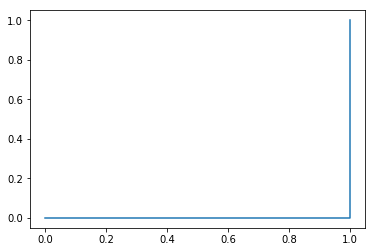

In [39]:
#画出AUC曲线图
plt.plot(fpr,tpr)
plt.show()

In [40]:
roc_auc

0.0

In [41]:
score

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0